In [14]:
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

METADATA = {'Contributor': 'T. Dunn'}
FSIZE = [5,4]
FDPI = 100
SAVEFIGS = True

df0 = pd.read_csv('./monster-saves.csv')
df0 = df0.astype({'Book': 'category', 'Category': 'category', 'Legendary': 'category', 'Type': 'category', 'Size': 'category'})
df0 = df0.astype({'AC': 'int32', 'adj AC': 'int32'})

df0 = pd.read_csv('./monster-saves.csv')

dfD = pd.read_csv('dmg-targets.csv') # 'CR','PB','AC','AB'
#dfD.set_index('CR', inplace=True)

print('Includes {} monsters in database'.format(len(df0.index.to_list())))

Includes 1436 monsters in database


In [28]:
def average_ability_mod(row):
    return (row['Str Mod'] + row['Dex Mod'] + row['Con Mod'] + row['Int Mod'] + row['Wis Mod'] + row['Cha Mod'])/6.0

def average_save_bonus(row):
    return (row['Str Save'] + row['Dex Save'] + row['Con Save'] + row['Int Save'] + row['Wis Save'] + row['Cha Save'])/6.0

def adjusted_AC(row):
    adjAC = 13 + (row['Str Save'] + row['Dex Save'] + row['Con Save'] + row['Int Save'] + row['Wis Save'] + row['Cha Save'])/6.0
    adjAC = (adjAC + row['AC'])/2.0
    return adjAC

def adjusted_AC2(row):
    adjAC = 13 + (row['Str Mod'] + row['Dex Mod'] + row['Con Mod'] + row['Int Mod'] + row['Wis Mod'] + row['Cha Mod'])/6.0
    adjAC = (adjAC + row['AC'])/2.0
    return adjAC

def nProficiencies(row):
    n = row['Str Prof'] + row['Dex Prof'] + row['Con Prof'] + row['Int Prof'] + row['Wis Prof'] + row['Cha Prof']
    return n

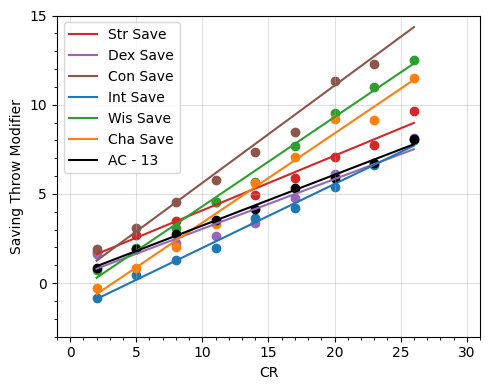

In [7]:
# Saving throw modifier
columns = ['Str Save','Dex Save','Con Save','Int Save','Wis Save','Cha Save','AC - 13']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e','k']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['AC - 13'] = df1['AC'] - 13
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,15], xlabel='CR', ylabel='Saving Throw Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

if SAVEFIGS: plt.savefig('./monster-save-bonus-trends.svg', metadata=METADATA)

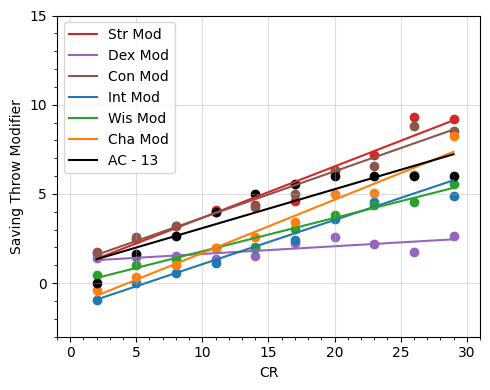

In [27]:
# Saving throw modifier
columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod','AC - 13']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e','k']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 30)]

dfD0 = dfD.set_index('CR')
df1['AC - 13'] = df1.apply(lambda row: dfD0.loc[row['CR'], 'AC'] - 13, axis=1)
#df1['AC - 13'] = df1['AC'] - 13
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,15], xlabel='CR', ylabel='Saving Throw Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

if SAVEFIGS: plt.savefig('./monster-save-modifier-trends.svg', metadata=METADATA)

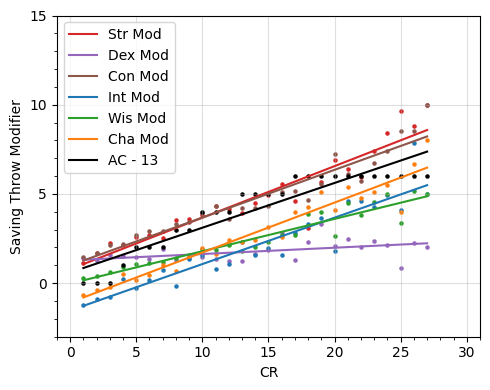

In [26]:
# Saving throw modifier
columns = ['Str Mod','Dex Mod','Con Mod','Int Mod','Wis Mod','Cha Mod','AC - 13']
colors = ['#d62728','#9467bd','#8c564b','#1f77b4','#2ca02c','#ff7f0e','k']


df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]

dfD0 = dfD.set_index('CR')
df1['AC - 13'] = df1.apply(lambda row: dfD0.loc[row['CR'], 'AC'] - 13, axis=1)
#df1['AC - 13'] = df1['AC'] - 13
#df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').mean()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

x = dfG.index.to_series()
for column, c in zip(columns, colors):
    coefs = np.polyfit(x, dfG[column], 1)
    #print(column, coefs)
    poly = np.poly1d(coefs)
    ax.scatter(dfG.index.to_series(), dfG[column], color=c, s=5)
    ax.plot(x, poly(x), '-', label=column, color=c)

ax.set(xlim=[-1,31], ylim=[-3,15], xlabel='CR', ylabel='Saving Throw Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend()

#if SAVEFIGS: plt.savefig('./monster-save-modifier-trends.svg', metadata=METADATA)

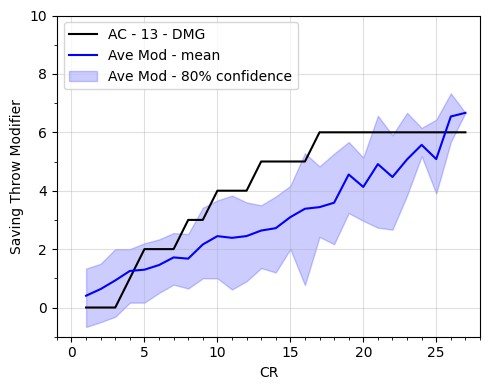

In [44]:
# average ability modifier vs AC target
conf = 0.8

dfD1 = dfD.set_index('CR')
df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['Ave Mod'] = df1.apply(lambda row: average_ability_mod(row), axis=1)
#df1['AC - 13'] = df1['AC'] - 13
df1['AC - 13'] = df1.apply(lambda row: dfD1.loc[row['CR'], 'AC'] - 13, axis=1)

dfG = df1.groupby('CR').mean().reset_index()
dfU = df1.groupby('CR').quantile(0.5 + conf/2).reset_index()
dfL = df1.groupby('CR').quantile(0.5 - conf/2).reset_index()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()
    
ax.plot(dfG['CR'], dfG['AC - 13'], '-', label='AC - 13 - DMG', color='k')
ax.plot(dfG['CR'], dfG['Ave Mod'], '-', color='b', label='Ave Mod - mean')
ax.fill_between(dfG['CR'], dfL['Ave Mod'], dfU['Ave Mod'], alpha=0.2, color='b', label='Ave Mod - {:.0f}% confidence'.format(conf*100))

ax.set(xlim=[-1,28], ylim=[-1,10], xlabel='CR', ylabel='Saving Throw Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend(loc='upper left')

#if SAVEFIGS: plt.savefig('./monster-save-modifier-trends.svg', metadata=METADATA)

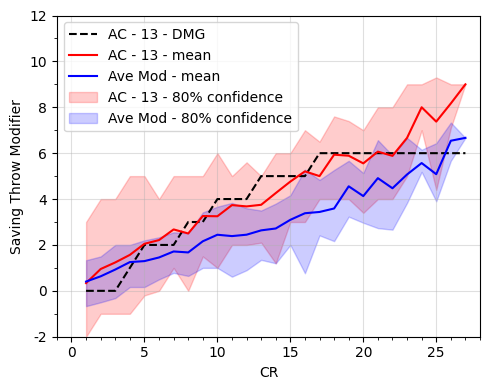

In [48]:
# average ability modifier vs average AC
conf = 0.8

dfD1 = dfD[dfD['CR'].between(1, 27)]
dfD1['AC - 13'] = dfD1['AC'] - 13

df1 = df0[df0['Category'].isin(['generic','legendary','unique']) & df0['CR'].between(1, 27)]
df1['Ave Mod'] = df1.apply(lambda row: average_ability_mod(row), axis=1)
df1['AC - 13'] = df1['AC'] - 13

dfG = df1.groupby('CR').mean().reset_index()
dfU = df1.groupby('CR').quantile(0.5 + conf/2).reset_index()
dfL = df1.groupby('CR').quantile(0.5 - conf/2).reset_index()

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

ax.plot(dfD1['CR'], dfD1['AC - 13'], '--', label='AC - 13 - DMG', color='k')

ax.plot(dfG['CR'], dfG['AC - 13'], '-', label='AC - 13 - mean', color='r')
ax.fill_between(dfG['CR'], dfL['AC - 13'], dfU['AC - 13'], alpha=0.2, color='r', label='AC - 13 - {:.0f}% confidence'.format(conf*100))

ax.plot(dfG['CR'], dfG['Ave Mod'], '-', color='b', label='Ave Mod - mean')
ax.fill_between(dfG['CR'], dfL['Ave Mod'], dfU['Ave Mod'], alpha=0.2, color='b', label='Ave Mod - {:.0f}% confidence'.format(conf*100))

ax.set(xlim=[-1,28], ylim=[-2,12], xlabel='CR', ylabel='Saving Throw Modifier')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major', axis='both', alpha=0.4)
ax.label_outer()
ax.legend(loc='upper left')

#if SAVEFIGS: plt.savefig('./monster-save-modifier-trends.svg', metadata=METADATA)

In [74]:
CRmins = [1, 11,21]
CRmaxs = [10,20,30]
for CRmin, CRmax in zip(CRmins, CRmaxs):
    print('For 3-4 saving throw proficiencies, average SB increases by {:.2f} between CRs {:2d} - {:2d}.'.format(dfD[dfD['CR'].between(CRmin, CRmax)].mean()['PB']*3.5/6, CRmin, CRmax))
for CRmin, CRmax in zip(CRmins, CRmaxs):
    print('For 5-6 saving throw proficiencies, average SB increases by {:.2f} between CRs {:2d} - {:2d}.'.format(dfD[dfD['CR'].between(CRmin, CRmax)].mean()['PB']*5.5/6, CRmin, CRmax))


For 3-4 saving throw proficiencies, average SB increases by 1.63 between CRs  1 - 10.
For 3-4 saving throw proficiencies, average SB increases by 3.03 between CRs 11 - 20.
For 3-4 saving throw proficiencies, average SB increases by 4.55 between CRs 21 - 30.
For 5-6 saving throw proficiencies, average SB increases by 2.57 between CRs  1 - 10.
For 5-6 saving throw proficiencies, average SB increases by 4.77 between CRs 11 - 20.
For 5-6 saving throw proficiencies, average SB increases by 7.15 between CRs 21 - 30.
